In [1]:
# Notebook to demonstrate how to average the thermo and kinetic parameters for a reaction found in two mechanisms

In [343]:
import cantera as ct
from rmgpy import chemkin
import rmgpy.reaction
import rmgpy.species
import rmgpy.kinetics
import rmgpy.constants
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'rmgpy.model'

In [39]:
# load the models
rmg_model = 'models/RMG/chem_annotated.cti'
rmg_dict_file = 'models/RMG/species_dictionary.txt'

NIST_model = 'models/NIST/2-BTP_kinetics.cti'
NIST_dict_file = 'models/NIST/species_dictionary.txt'

gas_rmg = ct.Solution(rmg_model)
gas_nist = ct.Solution(NIST_model)

For species CH2OCH, discontinuity in cp/R detected at Tmid = 500.0
	Value computed using low-temperature polynomial:  8.393471510000001
	Value computed using high-temperature polynomial: 9.1801039121875

For species CH2OCH, discontinuity in h/RT detected at Tmid = 500.0
	Value computed using low-temperature polynomial:  42.199147089791666
	Value computed using high-temperature polynomial: 41.961461604875005

For species CH2OCH, discontinuity in s/R detected at Tmid = 500.0
	Value computed using low-temperature polynomial:  33.70692865946735
	Value computed using high-temperature polynomial: 33.51209988778391

For species C4H5-2, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  47.65235236593109
	Value computed using high-temperature polynomial: 48.43623165666667

For species C4H5-2, discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  52.42918829260522
	Value computed using high-temperature p

In [68]:
dir(gas_nist.species()[5].thermo)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_check_n_coeffs',
 'coeffs',
 'cp',
 'derived_type',
 'h',
 'max_temp',
 'min_temp',
 'n_coeffs',
 'reference_pressure',
 's']

In [56]:
# load an rmg/chemkin model just for the hell of it
chemkin_path = '/home/moon/rmg/my_examples/ethane/chemkin/chem_annotated.inp'
dictionary_path = '/home/moon/rmg/my_examples/ethane/chemkin/species_dictionary.txt'
transport_path = '/home/moon/rmg/my_examples/ethane/chemkin/tran.dat'

species_list, reaction_list = rmgpy.chemkin.load_chemkin_file(chemkin_path, dictionary_path=dictionary_path, transport_path=transport_path)


In [404]:
type(reaction_list[0].kinetics)

rmgpy.kinetics.arrhenius.Arrhenius

In [119]:
for sp in species_list:
    print(sp)


Ar
He
Ne
N2
ethane(1)
C(3)
[CH3](4)
C[CH2](5)
[H](6)
C=C(9)
[H][H](11)
[CH]=C(14)
[CH2]CC(16)
C#C(20)
[CH2]CC=C(22)
[C]=C-2(24)
[CH]=CC(25)
[CH]=CCC(26)
[CH]=CC=C(28)
[CH2]C1CC1(40)
C=CC=C(41)
[CH2]C=C[CH2](42)
[CH2]C=CC(44)
CC1[CH]C1(63)
C=C=CC(69)
C1=CCC1(88)
[C]1CCC1(129)


In [85]:
species_list[5].thermo.polynomials

[NASAPolynomial(coeffs=[4.20541,-0.00535556,2.51123e-05,-2.13762e-08,5.97521e-12,-10161.9,-0.921274], Tmin=(100,'K'), Tmax=(1084.12,'K')),
 NASAPolynomial(coeffs=[0.908274,0.0114541,-4.57173e-06,8.2919e-10,-5.66313e-14,-9719.98,13.993], Tmin=(1084.12,'K'), Tmax=(5000,'K'))]

In [86]:
species_list[5].thermo.Tmax

(5000,'K')

In [40]:
NIST_dict = chemkin.load_species_dictionary(NIST_dict_file)

In [42]:
NIST_dict

{'H': Species(label="H", molecule=[Molecule(smiles="[H]")], molecular_weight=(1.00797,'amu')),
 'O2': Species(label="O2", molecule=[Molecule(smiles="[O][O]")], molecular_weight=(31.9988,'amu')),
 'O': Species(label="O", molecule=[Molecule(smiles="[O]")], molecular_weight=(15.9994,'amu')),
 'OH': Species(label="OH", molecule=[Molecule(smiles="[OH]")], molecular_weight=(17.0074,'amu')),
 'H2': Species(label="H2", molecule=[Molecule(smiles="[H][H]")], molecular_weight=(2.01594,'amu')),
 'H2O': Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu')),
 'CO2': Species(label="CO2", molecule=[Molecule(smiles="O=C=O")], molecular_weight=(44.0094,'amu')),
 'HO2': Species(label="HO2", molecule=[Molecule(smiles="[O]O")], molecular_weight=(33.0068,'amu')),
 'H2O2': Species(label="H2O2", molecule=[Molecule(smiles="OO")], molecular_weight=(34.0147,'amu')),
 'CO': Species(label="CO", molecule=[Molecule(smiles="[C-]#[O+]")], molecular_weight=(28.01,'amu')),
 'HCO': Speci

In [ ]:
def same_reaction(rxn1, rxn2, species_dict1, species_dict2):
    # function to figure out if the two reactions are the same (describing the same stoichiometry)
    pass

In [18]:
def mix_reaction(rxn0, rxn1, w):
    # function to mix reaction 0 and reaction 1 according to weight (a slider from 0-1)
    # 0 is all reaction 0 and 1 is all reaction 1
    
    Tmin = 298
    Tmax = 1500
    
    T = np.linspace(Tmin, Tmax, 1001)
    
    

In [35]:
reaction1 = gas_nist.reactions()[0]
reaction2 = gas_nist.reactions()[1]

reaction_mix = mix_reaction(reaction1, reaction2, 0.5)


In [49]:
def lookup_species(gas, name):
    species_list = gas.species()
    for i, sp in species_list:
        if sp.name == name:
            return species_list[i]

In [43]:
print(reaction1)

reactants = []
for key in reaction1.reactants.keys():
    rmg_species = NIST_dict[key]
    ct_species = lookup_species(gas_nist, key)
    rmg_speces.thermo = 
    reactants.append(NIST_dict[key])

products = []
for key in reaction1.products.keys():
    products.append(NIST_dict[key])

# store the species in a reaction object
reactionA = rmgpy.reaction.Reaction(
    reactants=reactants,
    products=products
)

H + O2 <=> O + OH


In [378]:
gas_nist.species()[1].thermo.h(500)

5921583.011507461

In [379]:
dir(gas_nist.species()[1].thermo)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_check_n_coeffs',
 'coeffs',
 'cp',
 'derived_type',
 'h',
 'max_temp',
 'min_temp',
 'n_coeffs',
 'reference_pressure',
 's']

In [374]:
gas_nist.species()[1].thermo.h

<function NasaPoly2.h>

In [402]:
for i, rxn in enumerate(gas_nist.reactions()):
    if type(rxn) != ct._cantera.Arrhenius and type(rxn) != ct._cantera.ElementaryReaction:
        print(type(rxn))
    if type(rxn) == ct._cantera.ThreeBodyReaction:
        print(i, rxn)
# dir(gas_nist.reactions()[10])

<class 'cantera._cantera.ThreeBodyReaction'>
4 2 H + M <=> H2 + M
<class 'cantera._cantera.ThreeBodyReaction'>
8 H + OH + M <=> H2O + M
<class 'cantera._cantera.ThreeBodyReaction'>
9 H + O + M <=> OH + M
<class 'cantera._cantera.ThreeBodyReaction'>
10 2 O + M <=> O2 + M
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.ThreeBodyReaction'>
38 HCO + M <=> CO + H + M
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cantera._cantera.FalloffReaction'>
<class 'cante

In [373]:
def ct2rmg_thermo(ct_thermo):
    rmg_thermo = rmgpy.thermo.nasa.NASA()
    rmg_thermo.Tmin = (ct_thermo.min_temp, 'K')
    rmg_thermo.Tmax = (ct_thermo.max_temp, 'K')
    midpoint = ct_thermo.coeffs[0]
    a_high = ct_thermo.coeffs[1:8]
    a_low = ct_thermo.coeffs[8:]
    
    nasa1 = rmgpy.thermo.nasa.NASAPolynomial()
    nasa2 = rmgpy.thermo.nasa.NASAPolynomial()
    
    nasa1.coeffs = a_low
    nasa1.Tmin = rmg_thermo.Tmin
    nasa1.Tmax = (midpoint, 'K')
    
    nasa2.coeffs = a_high
    nasa2.Tmin = (midpoint, 'K')
    nasa2.Tmax = rmg_thermo.Tmax
    
    rmg_thermo.polynomials = [nasa1, nasa2]
    
    return rmg_thermo

In [412]:
dir(gas_nist.reactions()[0].rate)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'activation_energy',
 'pre_exponential_factor',
 'temperature_exponent']

In [413]:
def ct2rmg_kinetics(ct_reaction):
    
    reactants = []
    for key in ct_reaction.reactants.keys():
        rmg_species = NIST_dict[key]
        ct_species = lookup_species(gas_nist, key)
        rmg_speces.thermo = 
        reactants.append(NIST_dict[key])

    products = []
    for key in ct_reaction.products.keys():
        products.append(NIST_dict[key])

    # store the species in a reaction object
    reactionA = rmgpy.reaction.Reaction(
        reactants=reactants,
        products=products
    )
    
    # takes a cantera reaction and converts to RMG kinetics
    if type(ct_reaction) == ct._cantera.Arrhenius or type(ct_reaction) == ct._cantera.ElementaryReaction:
        rmg_kinetics = rmgpy.kinetics.arrhenius.Arrhenius(
            A=ct_reaction.rate.pre_exponential_factor,
            n=ct_reaction.rate.temperature_exponent,
            Ea=ct_reaction.rate.activation_energy)
    elif type(ct_reaction) == ct._cantera.ThreeBodyReaction:
        raise NotImplemented
    elif type(ct_reaction) == ct._cantera.FalloffReaction:
        raise NotImplemented
    else:
        raise ValueError('Invalid kind of reaction')
    return rmg_kinetics

In [423]:
gas_nist.reactions()[0].rate.pre_exponential_factor

22030000000000.0

In [425]:
dir(gas_nist.reactions()[0].rate)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'activation_energy',
 'pre_exponential_factor',
 'temperature_exponent']

In [420]:
print(ct2rmg_kinetics(gas_nist.reactions()[0]))

QuantityError: Invalid units ''. Common units: ['s^-1', 'm^3/(mol*s)', 'cm^3/(mol*s)', 'm^3/(molecule*s)', 'cm^3/(molecule*s)']

In [116]:
print(gas_nist.species()[1])
rmg1 = ct2rmg_thermo(gas_nist.species()[1].thermo)
print(rmg1)

<Species N2>
NASA(polynomials=[NASAPolynomial(coeffs=[3.29868,0.00140824,-3.96322e-06,5.64152e-09,-2.44485e-12,-1020.9,3.95037], Tmin=(300,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[2.92664,0.00148798,-5.68476e-07,1.0097e-10,-6.75335e-15,-922.798,5.98053], Tmin=(1000,'K'), Tmax=(5000,'K'))], Tmin=(300,'K'), Tmax=(5000,'K'))


In [ ]:
# plot the results of cantera converted to RMG thermo




## Plot the Thermodynamic Parameters vs. Temperature

In [111]:
def plot_thermos(thermos, labels=None):
    %matplotlib inline
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('H (kJ / mol)')
    ax[0].set_title('Enthalpy vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('S (kJ / mol K)')
    ax[1].set_title('Entropy vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity vs. Temperature')
    T = np.linspace(300, 3000, 1001)
    for thermo in thermos:
        H = np.zeros(len(T))
        S = np.zeros(len(T))
        Cp = np.zeros(len(T))
        for i in range(0, len(T)):
            H[i] = thermo.get_enthalpy(T[i]) / 1000.0
            S[i] = thermo.get_entropy(T[i]) / 1000.0
            Cp[i] = thermo.get_heat_capacity(T[i]) / 1000.0
        ax[0].plot(T, H)
        ax[1].plot(T, S)
        ax[2].plot(T, Cp)
    ax[0].legend(labels)
    ax[1].legend(labels)
    ax[2].legend(labels)
    plt.subplots_adjust(wspace=0.25)

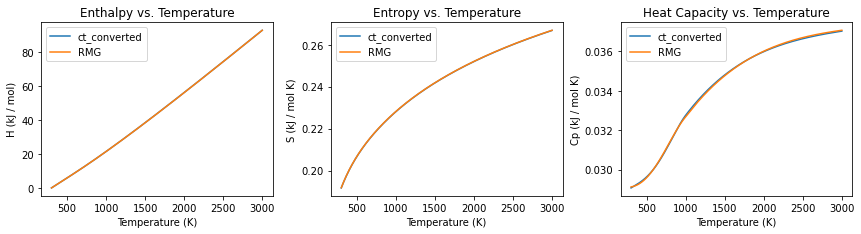

In [120]:
plot_thermos([rmg1, species_list[3]], labels=['ct_converted', 'RMG'])

In [83]:
gas_nist.species()[1].thermo.coeffs

array([ 1.0000000e+03,  2.9266400e+00,  1.4879768e-03, -5.6847600e-07,
        1.0097038e-10, -6.7533510e-15, -9.2279770e+02,  5.9805280e+00,
        3.2986770e+00,  1.4082404e-03, -3.9632220e-06,  5.6415150e-09,
       -2.4448540e-12, -1.0208999e+03,  3.9503720e+00])

In [22]:
reaction1.rate

Arrhenius(A=2.203e+13, b=-0.671, E=7.12995e+07)

In [24]:
reaction1

<ElementaryReaction: H + O2 <=> O + OH>

In [166]:
rmg1.Tmin = (290, 'K')

In [170]:
rmg1.get_entropy(298)

ValueError: No valid NASA polynomial at temperature 298 K.

In [159]:
dir(rmg1)

['Cp0',
 'CpInf',
 'E0',
 'Tmax',
 'Tmin',
 '_Cp0',
 '_CpInf',
 '_E0',
 '_Tmax',
 '_Tmin',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'as_dict',
 'change_base_enthalpy',
 'change_base_entropy',
 'comment',
 'discrepancy',
 'get_enthalpy',
 'get_entropy',
 'get_free_energy',
 'get_heat_capacity',
 'is_identical_to',
 'is_similar_to',
 'is_temperature_valid',
 'label',
 'make_object',
 'poly1',
 'poly2',
 'poly3',
 'polynomials',
 'select_polynomial',
 'to_cantera',
 'to_thermo_data',
 'to_wilhoit']

In [151]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [259]:
def mix_thermo_v1(species0, species1, w):
    # function to mix species 0 and species 1 according to weight (a slider from 0-1)
    # 0 is all species 0 and 1 is all species 1
    
    # Use the RMG thermo object rmgpy.thermo.nasa.NASA
    
    # My idea for getting this to work is to refit a NASA polynomial using a weighting implemented by adding more points to the fit
    # for example, a 0.1 will lead to 100 points from thermo0 and 1000 points from thermo1
    # As long as this is approximate, I think it will have the desired effect
    
    thermo0 = species0.thermo
    thermo1 = species1.thermo
    
    w = np.round(w, 2)  # need hundredths place to limit the number of points to include
    # we want the fit to include ~1001 points no matter what
    N_total = 1001
    N_0 = int(np.round(N_total * w))
    N_1 = N_total - N_0
    
    
    # generate all the Tdata and Cpdata
    import rmgpy.quantity
    Tdata = np.zeros(N_total + 1)
    Cpdata = np.zeros(N_total + 1)
    
#     print(thermo0.Tmin.value)
#     print(thermo1.Tmin.value)
    
    if N_0 > 0:
        Tdata0 = np.linspace(thermo0.Tmin.value, thermo0.Tmax.value, N_0)
        for i, T in enumerate(Tdata0):
            Tdata[i + 1] = T
            Cpdata[i + 1] = thermo0.get_heat_capacity(T)
    if N_1 > 0:
        Tdata1 = np.linspace(thermo1.Tmin.value, thermo0.Tmax.value, N_1)
        for i, T in enumerate(Tdata1):
            Tdata[N_0 + i + 1] = T
            Cpdata[N_0 + i + 1] = thermo1.get_heat_capacity(T)     
   
    
    # put 298 in first position
    Tdata[0] = 300.0
    if w < 0.5:
        Cpdata[0] = thermo0.get_heat_capacity(Tdata[0])
    else:
        Cpdata[0] = thermo1.get_heat_capacity(Tdata[0])
    
    Tdata = rmgpy.quantity.Quantity(Tdata, 'K')
    Cpdata = rmgpy.quantity.Quantity(Cpdata, 'kJ/(mol*K)'),

    Tmin = np.minimum(thermo0.Tmin.value, thermo1.Tmin.value)
    Tmax = np.maximum(thermo0.Tmax.value, thermo1.Tmax.value)

    # Always use H298 and S298 from the first thermo given
    H298 = thermo0.get_enthalpy(298.0)
    H298 = rmgpy.quantity.Quantity(H298, 'kJ/mol')
    S298 = thermo0.get_entropy(298.0)
    S298 = rmgpy.quantity.Quantity(S298, 'kJ/(mol*K)')
#     Cp0 = rmgpy.quantity.Quantity(rmgpy.constants.R, 'kJ/(mol*K)')
#     CpInf = rmgpy.quantity.Quantity(thermo0.get_heat_capacity(thermo0.Tmax.value), 'kJ/(mol*K)')
    
    Cp0 = w * species0.calculate_cp0() + (1.0 - w) * species1.calculate_cp0()
    Cp0 = rmgpy.quantity.Quantity(Cp0, 'kJ/(mol*K)')
    CpInf = w * species0.calculate_cpinf() + (1.0 - w) * species1.calculate_cpinf()
    CpInf = rmgpy.quantity.Quantity(CpInf, 'kJ/(mol*K)')
#     Cp0 = rmgpy.quantity.Quantity(0.0, 'kJ/(mol*K)')
#     CpInf = rmgpy.quantity.Quantity(0.0, 'kJ/(mol*K)')

#     Cp0 = self.get_Cp0()
#     CpInf = self.get_CpInf()

#     Tmin = np.min(self.temperatures)
#     Tmax = np.max(self.temperatures)
    
    import rmgpy.thermo.thermodata
    my_data = rmgpy.thermo.thermodata.ThermoData(
        Tdata=Tdata,
        Cpdata=Cpdata,
        H298=H298,
        S298=S298,
        Cp0=Cp0,
        CpInf=CpInf,
    )
    Tint = 1000.0
    if Tint > Tmax or Tint < Tmin:
        Tint = (Tmax + Tmin) / 2.0
    nasa = my_data.to_nasa(Tmin, Tmax, Tint)
    return nasa


In [309]:
def mix_thermo(species0, species1, w):
    # function to mix species 0 and species 1 according to weight (a slider from 0-1)
    # 0 is all species 0 and 1 is all species 1
    
    # Use the RMG thermo object rmgpy.thermo.nasa.NASA
    
    # My idea for getting this to work is to refit a NASA polynomial using a weighting implemented by adding more points to the fit
    # for example, a 0.1 will lead to 100 points from thermo0 and 1000 points from thermo1
    # As long as this is approximate, I think it will have the desired effect
    
    thermo0 = species0.thermo
    thermo1 = species1.thermo
    
    Tmin = np.maximum(thermo0.Tmin.value, thermo1.Tmin.value)
    Tmax = np.minimum(thermo0.Tmax.value, thermo1.Tmax.value)
    
    N_total = 1001
    Tdata = np.linspace(Tmin, Tmax, N_total)
    Cpdata = np.zeros(N_total)
    for i, T in enumerate(Tdata):
        Cpdata[i] = w * thermo0.get_heat_capacity(T) + (1.0 - w) * thermo1.get_heat_capacity(T)
    
    
    
    # generate all the Tdata and Cpdata
    import rmgpy.quantity
    
    # put 298 in first position - I know, this is erasing one of the Tdata's but I don't care
    Tdata[0] = 300.0
    Cpdata[0] = w * thermo0.get_heat_capacity(Tdata[0]) + (1.0 - w) * thermo1.get_heat_capacity(Tdata[0])
#     if w < 0.5:
#         Cpdata[0] = thermo0.get_heat_capacity(Tdata[0])
#     else:
#         Cpdata[0] = thermo1.get_heat_capacity(Tdata[0])
    
    Tdata = rmgpy.quantity.Quantity(Tdata, 'K')
    Cpdata = rmgpy.quantity.Quantity(Cpdata, 'J/(mol*K)'),

    

    # Always use H298 and S298 from the first thermo given
    H298 = w * thermo0.get_enthalpy(298.0) + (1.0 - w) * thermo1.get_enthalpy(298.0)
    H298 = rmgpy.quantity.Quantity(H298, 'J/mol')
    S298 = w * thermo0.get_entropy(298.0) + (1.0 - w) * thermo1.get_entropy(298.0)
    S298 = rmgpy.quantity.Quantity(S298, 'J/(mol*K)')
#     Cp0 = rmgpy.quantity.Quantity(rmgpy.constants.R, 'kJ/(mol*K)')
#     CpInf = rmgpy.quantity.Quantity(thermo0.get_heat_capacity(thermo0.Tmax.value), 'kJ/(mol*K)')
    
    Cp0 = w * species0.calculate_cp0() + (1.0 - w) * species1.calculate_cp0()
    Cp0 = rmgpy.quantity.Quantity(Cp0, 'J/(mol*K)')
    CpInf = w * species0.calculate_cpinf() + (1.0 - w) * species1.calculate_cpinf()
    CpInf = rmgpy.quantity.Quantity(CpInf, 'J/(mol*K)')
#     Cp0 = rmgpy.quantity.Quantity(0.0, 'kJ/(mol*K)')
#     CpInf = rmgpy.quantity.Quantity(0.0, 'kJ/(mol*K)')

#     Cp0 = self.get_Cp0()
#     CpInf = self.get_CpInf()

#     Tmin = np.min(self.temperatures)
#     Tmax = np.max(self.temperatures)
    
    import rmgpy.thermo.thermodata
    my_data = rmgpy.thermo.thermodata.ThermoData(
        Tdata=Tdata,
        Cpdata=Cpdata,
        H298=H298,
        S298=S298,
        Cp0=Cp0,
        CpInf=CpInf,
    )
    Tint = 1000.0
    if Tint > Tmax or Tint < Tmin:
        Tint = (Tmax + Tmin) / 2.0
    nasa = my_data.to_nasa(Tmin, Tmax, Tint)
    return nasa


In [310]:
thermo4p5 = mix_thermo(species_list[4], species_list[5], 1.0)

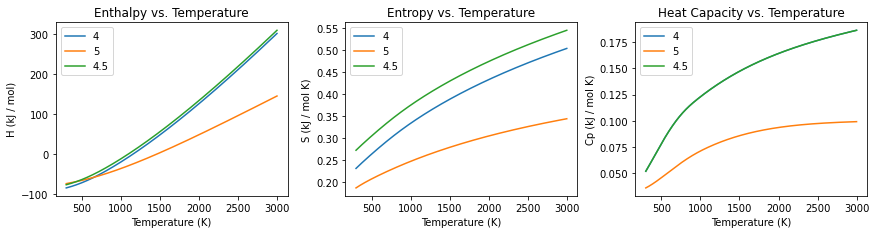

In [311]:
# plot_thermos([species_list[4].thermo, species_list[5].thermo], ['4', '5'])
plot_thermos([species_list[4].thermo, species_list[5].thermo, thermo4p5], ['4', '5', '4.5'])

In [255]:
species_list[4].calculate_cp0()
species_list[4].calculate_cpinf()

178.76114800000002

In [273]:
species_list[4].thermo.get_enthalpy(1000)

-20291.04182435502

In [274]:
species_list[4].get_enthalpy(1000)

-20291.04182435502

In [326]:
my_arrhenius = rmgpy.kinetics.arrhenius.Arrhenius()
my_arrhenius.fit_to_data(np.ndarray Tlist, np.ndarray klist, str kunits, double T0=1, np.ndarray weights=None,
                      bint three_params=True

In [341]:
reaction_list[1].get_rate_coefficient(1000)

3932.733159682358

In [347]:
len(reaction_list[1].reactants)

2

In [367]:
def mix_kinetics(reaction0, reaction1, w):
    # function to mix reaction 0 and reaction 1 according to weight (a slider from 0-1)
    # 0 is all reaction 0 and 1 is all reaction 1
    
    # Use the RMG thermo object rmgpy.thermo.nasa.NASA
    
    
    kinetics0 = reaction0.kinetics
    kinetics1 = reaction1.kinetics
    
    assert type(kinetics0) == rmgpy.kinetics.arrhenius.Arrhenius
    assert type(kinetics1) == rmgpy.kinetics.arrhenius.Arrhenius
    
    
    try:
        Tmin = np.maximum(kinetics0.Tmin.value, kinetics1.Tmin.value)
    except AttributeError:
        Tmin = 300
    try:
        Tmax = np.minimum(kinetics0.Tmax.value, kinetics1.Tmax.value)
    except AttributeError:
        Tmax = 3000
    
    N_total = 1001
    Tdata = np.linspace(Tmin, Tmax, N_total)
    kdata = np.zeros(N_total)
    lnkdata = np.zeros(N_total)
    for i, T in enumerate(Tdata):
        lnkdata[i] = w * np.log(kinetics0.get_rate_coefficient(T)) + (1.0 - w) * np.log(kinetics1.get_rate_coefficient(T))
        kdata[i] = np.exp(lnkdata[i])
#         kdata[i] = w * kinetics0.get_rate_coefficient(T) + (1.0 - w) * kinetics1.get_rate_coefficient(T)
    
    # get the units
    kunits = rmgpy.kinetics.model.get_rate_coefficient_units_from_reaction_order(len(reaction0.reactants))
    
    mixed_kinetics = rmgpy.kinetics.arrhenius.Arrhenius()
    mixed_kinetics.fit_to_data(Tdata, kdata, kunits)
    
    return mixed_kinetics



In [370]:
mixk = mix_kinetics(reaction_list[1], reaction_list[2], 0.75)

In [371]:
def plot_kinetics(kinetics, labels=None):
    %matplotlib inline
    plt.xlabel('1000 / T (K^-1)')
    plt.ylabel('ln(k)')
    
    T = np.linspace(300, 3000, 1001)
    for kinetic in kinetics:
        k = np.zeros(len(T))
        for i in range(0, len(T)):
            k[i] = kinetic.get_rate_coefficient(T[i])
        plt.plot(1000.0 / T, np.log(k))
      
    plt.legend(labels)

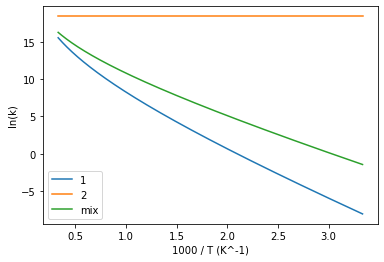

In [372]:
plot_kinetics([reaction_list[1].kinetics, reaction_list[2].kinetics, mixk], ['1', '2', 'mix'])